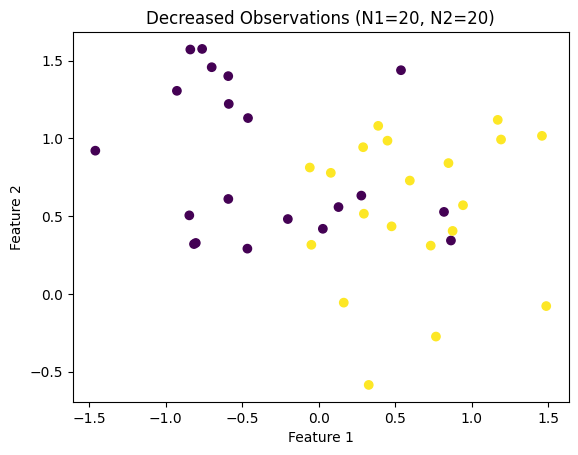

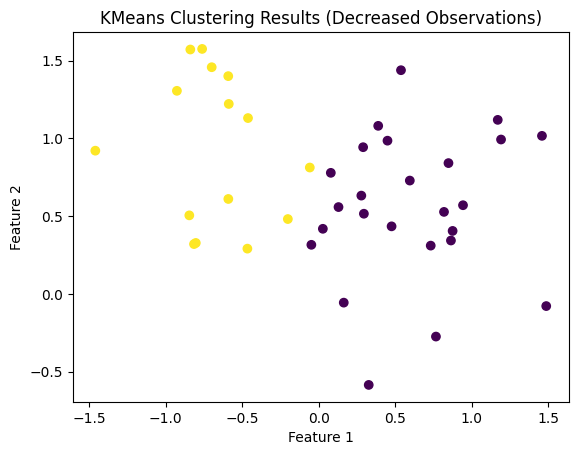

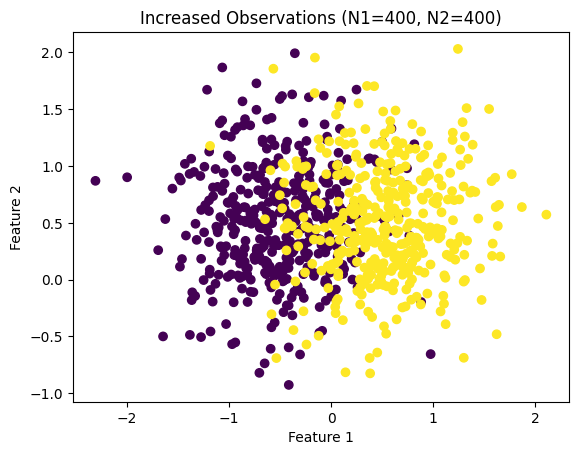

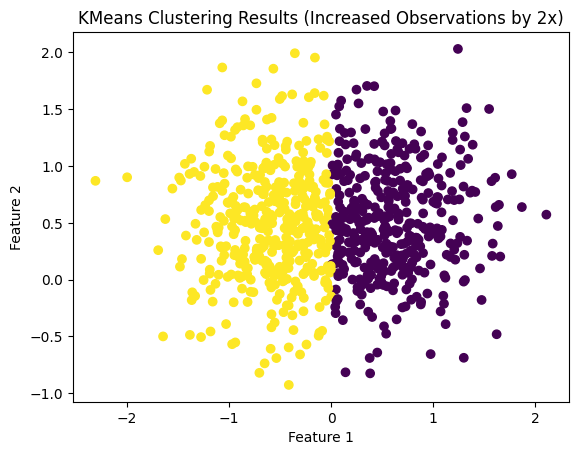

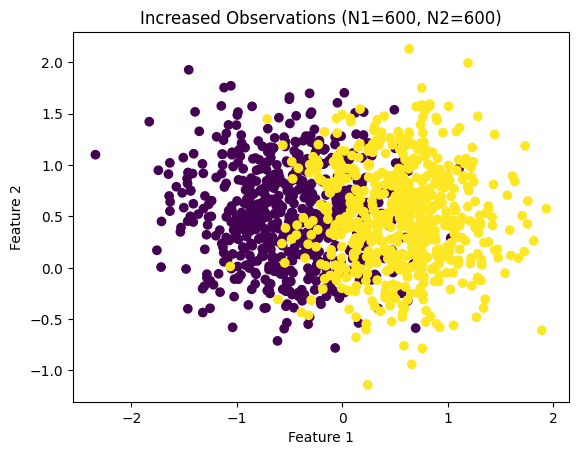

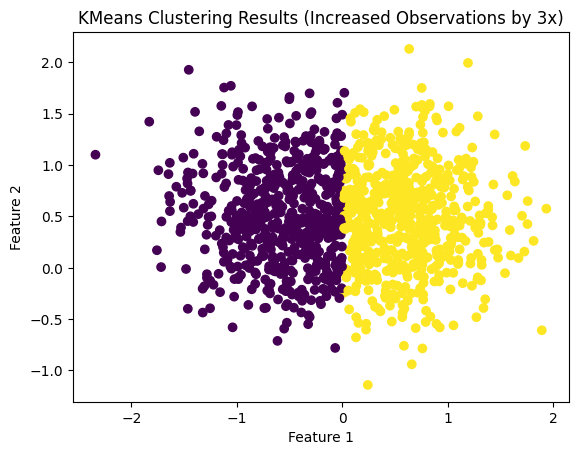

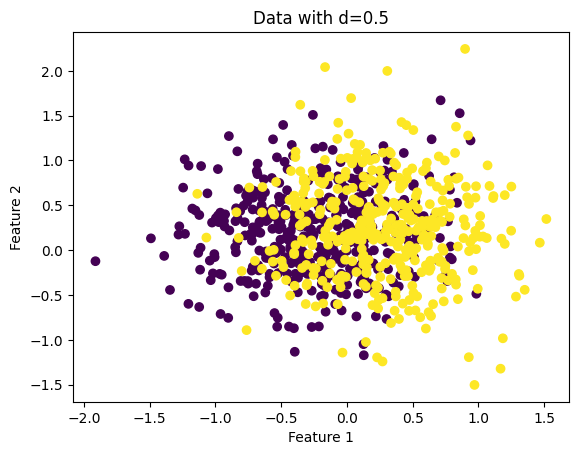

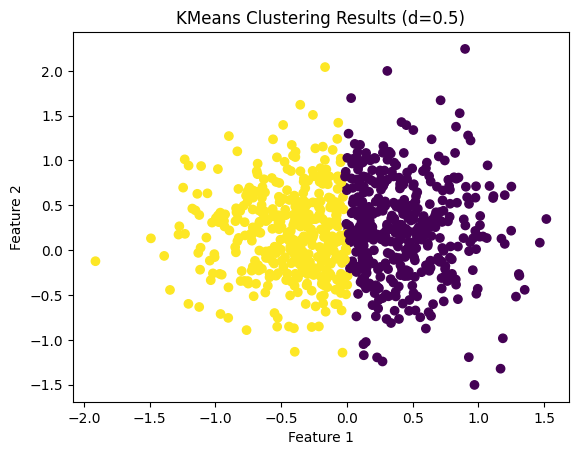

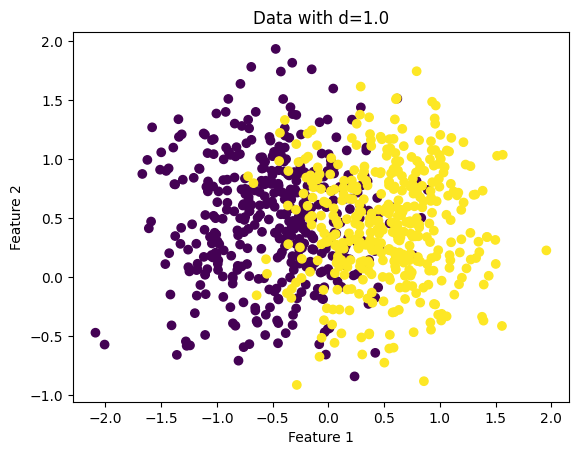

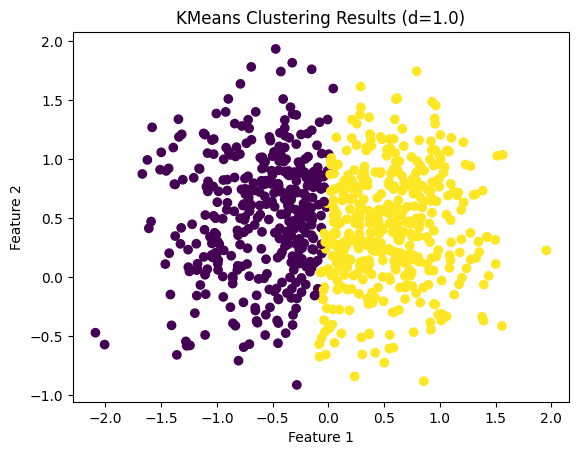

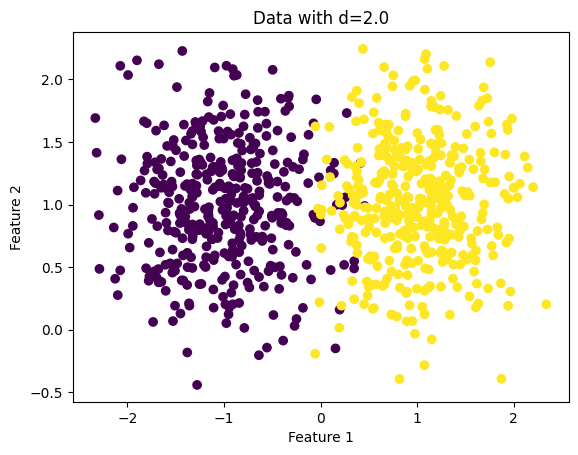

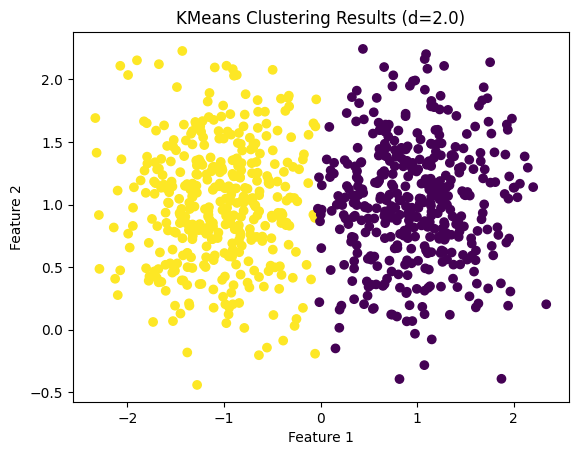

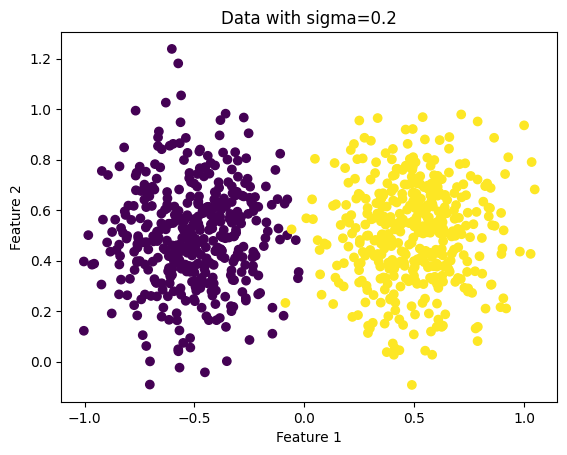

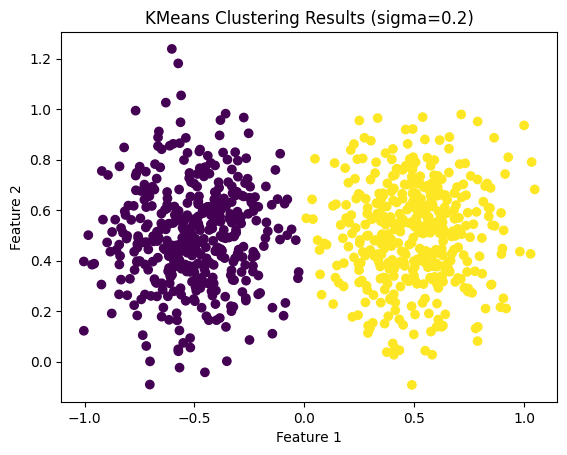

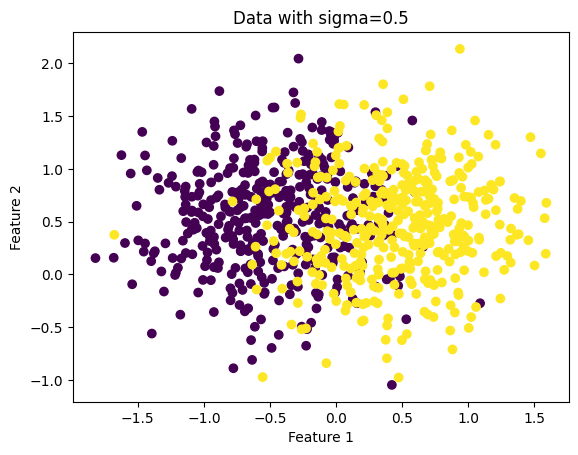

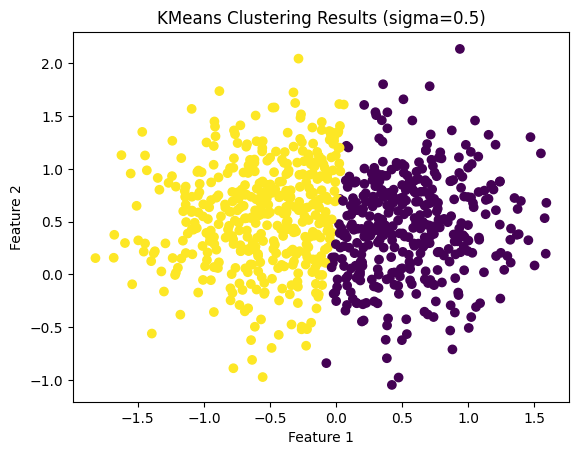

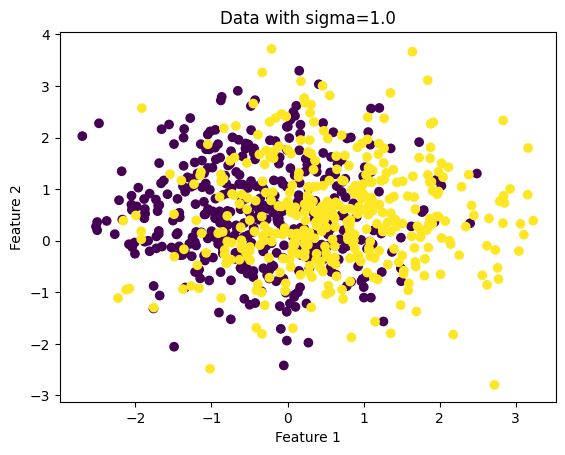

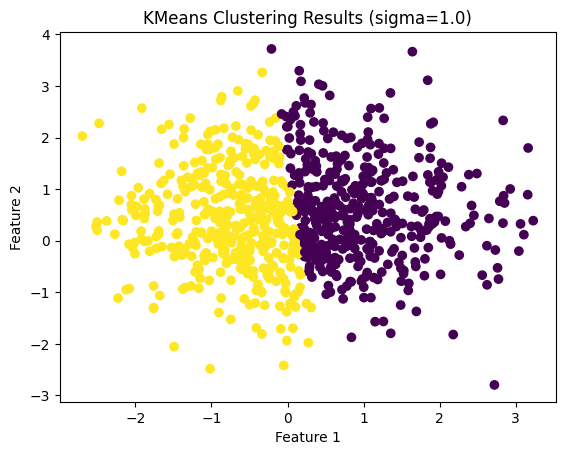

Final Accuracy: 0.84625


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to generate synthetic data
def generate_data(N1, N2, d, sigma1, sigma2):
    # Class center coordinates
    x1_center = d / 2 * np.array([-1, 1])
    x2_center = d / 2 * np.array([1, 1])

    # Create data points with noise
    noise1 = np.random.normal(scale=sigma1, size=(N1, 2))
    noise2 = np.random.normal(scale=sigma2, size=(N2, 2))

    # Combine data points
    X1 = x1_center + noise1
    X2 = x2_center + noise2
    X = np.concatenate((X1, X2), axis=0)

    # Class labels
    y = np.array([0] * N1 + [1] * N2)

    return X, y

# Function to plot the results
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Function to perform KMeans clustering
def perform_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    return kmeans_labels

# Experiment 1: Decreasing the number of observations
N1_decreasing = 20
N2_decreasing = 20
sigma1 = 0.5
sigma2 = 0.5
d = 1.0

# Generate data for decreased observations
X_decreasing, y_decreasing = generate_data(N1_decreasing, N2_decreasing, d, sigma1, sigma2)

# Visualize the data for decreased observations
plot_data(X_decreasing, y_decreasing, f"Decreased Observations (N1={N1_decreasing}, N2={N2_decreasing})")

# Perform KMeans clustering and plot the clustered data
kmeans_labels_decreasing = perform_kmeans(X_decreasing, n_clusters=2)
plot_data(X_decreasing, kmeans_labels_decreasing, f"KMeans Clustering Results (Decreased Observations)")

# Experiment 2: Increasing the number of observations (multiplying by 2)
N1_increasing_2 = 400
N2_increasing_2 = 400

# Generate data for increased observations (multiplied by 2)
X_increasing_2, y_increasing_2 = generate_data(N1_increasing_2, N2_increasing_2, d, sigma1, sigma2)

# Visualize the data for increased observations
plot_data(X_increasing_2, y_increasing_2, f"Increased Observations (N1={N1_increasing_2}, N2={N2_increasing_2})")

# Perform KMeans clustering and plot the clustered data
kmeans_labels_increasing_2 = perform_kmeans(X_increasing_2, n_clusters=2)
plot_data(X_increasing_2, kmeans_labels_increasing_2, f"KMeans Clustering Results (Increased Observations by 2x)")

# Experiment 3: Further increasing the number of observations (multiplying by 3)
N1_increasing_3 = 600
N2_increasing_3 = 600

# Generate data for increased observations (multiplied by 3)
X_increasing_3, y_increasing_3 = generate_data(N1_increasing_3, N2_increasing_3, d, sigma1, sigma2)

# Visualize the data for increased observations
plot_data(X_increasing_3, y_increasing_3, f"Increased Observations (N1={N1_increasing_3}, N2={N2_increasing_3})")

# Perform KMeans clustering and plot the clustered data
kmeans_labels_increasing_3 = perform_kmeans(X_increasing_3, n_clusters=2)
plot_data(X_increasing_3, kmeans_labels_increasing_3, f"KMeans Clustering Results (Increased Observations by 3x)")

# Experiment 4: Varying the distance between the clusters (d)
d_values = [0.5, 1.0, 2.0]
for d_val in d_values:
    X_d, y_d = generate_data(N1_increasing_2, N2_increasing_2, d_val, sigma1, sigma2)
    plot_data(X_d, y_d, f"Data with d={d_val}")

    # Perform KMeans clustering and plot the clustered data
    kmeans_labels_d = perform_kmeans(X_d, n_clusters=2)
    plot_data(X_d, kmeans_labels_d, f"KMeans Clustering Results (d={d_val})")

# Experiment 5: Varying the standard deviation (sigma1 and sigma2)
sigma_values = [0.2, 0.5, 1.0]
for sigma_val in sigma_values:
    X_sigma, y_sigma = generate_data(N1_increasing_2, N2_increasing_2, d, sigma_val, sigma_val)
    plot_data(X_sigma, y_sigma, f"Data with sigma={sigma_val}")

    # Perform KMeans clustering and plot the clustered data
    kmeans_labels_sigma = perform_kmeans(X_sigma, n_clusters=2)
    plot_data(X_sigma, kmeans_labels_sigma, f"KMeans Clustering Results (sigma={sigma_val})")

# Final Clustering with the optimal N1, N2, d, sigma values
X_final, y_final = generate_data(N1_increasing_2, N2_increasing_2, 1.0, 0.5, 0.5)
kmeans_final_labels = perform_kmeans(X_final, n_clusters=2)

# Calculate and print the final accuracy
aligned_final_labels = np.zeros_like(kmeans_final_labels)
for cluster in range(2):
    mask = (kmeans_final_labels == cluster)
    aligned_final_labels[mask] = np.argmax(np.bincount(y_final[mask]))
accuracy = np.sum(aligned_final_labels == y_final) / len(y_final)
print("Final Accuracy:", accuracy)
